<a href="https://colab.research.google.com/github/marshaadp/DEP-BIN-PROJECT/blob/main/LINEAR_REGRESSION_StudentPerform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. LINEAR REGRESSION**

Tujuan :
1. Memprediksi nilai akhir siswa G3 berdasarkan variabel-variabel independen lainnya.

2. Untuk mengukur dampak dari variabel2 kelompok independen terhadap nilai akhir siswa di G1, G2, G3

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

# LOAD DATA

In [ ]:
df = pd.read_csv('mat2.csv')

COLLECTING DATA

In [ ]:
print(df.head())  # show the first few rows of the data

   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F   18       U     GT3       A     4     4  at_home   
1           1     GP   F   17       U     GT3       T     1     1  at_home   
2           2     GP   F   15       U     LE3       T     1     1  at_home   
3           3     GP   F   15       U     GT3       T     4     2   health   
4           4     GP   F   16       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...      4        3     4     1     1       3        6   5   6   6  
1  ...      5        3     3     1     1       3        4   5   5   6  
2  ...      4        3     2     2     3       3       10   7   8  10  
3  ...      3        2     2     1     1       5        2  15  14  15  
4  ...      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]


Visualizing Distribution of Data

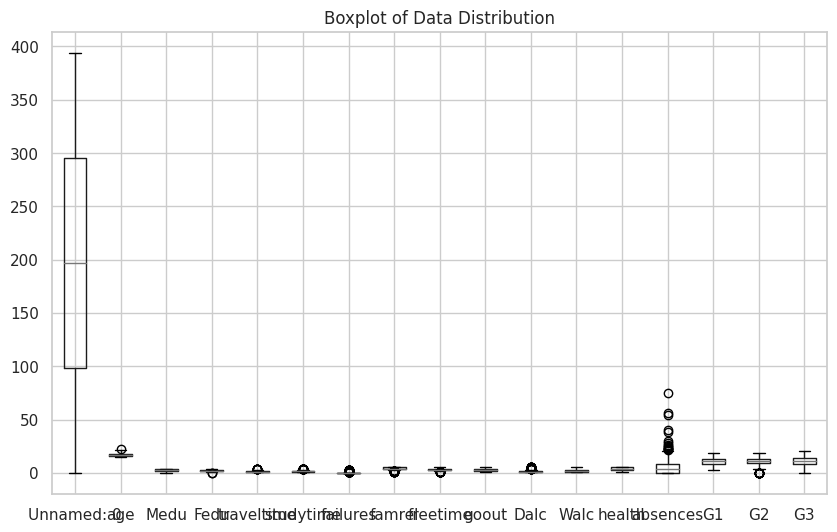

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Data Distribution')
plt.show()

Pengecekan Data Kosong

In [ ]:
print(df.eq(0).sum())

Unnamed: 0      1
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64


Reading and Checking the structure of the data

In [ ]:
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

Convert categorical variables to numerical variables

In [ ]:
df['school'] = df['school'].map({'GP': 0, 'MS': 1}).astype(int)
df['sex'] = df['sex'].map({'F': 0, 'M': 1}).astype(int)
df['address'] = df['address'].map({'U': 0, 'R': 1}).astype(int)
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1}).astype(int)
df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}).astype(int)
df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df['schoolsup'] = df['schoolsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['famsup'] = df['famsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['paid'] = df['paid'].map({'no' : 0, 'yes' : 1}).astype(int)
df['activities'] = df['activities'].map({'no' : 0, 'yes' : 1}).astype(int)
df['higher'] = df['higher'].map({'no' : 0, 'yes' : 1}).astype(int)
df['nursery'] = df['nursery'].map({'no' : 0, 'yes' : 1}).astype(int)
df['internet'] = df['internet'].map({'no' : 0, 'yes' : 1}).astype(int)
df['romantic'] = df['romantic'].map({'no' : 0, 'yes' : 1}).astype(int)

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['school','sex','age','address','famsize','Pstatus', 'Medu', 'Fedu',
                    'Mjob','Fjob','reason','guardian','traveltime', 'studytime', 'failures',
                    'schoolsup','famsup','paid','activities','higher','internet','romantic',
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                    'G1', 'G2', 'G3']

# Fit and transform the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)


     Unnamed: 0  school  sex       age  address  famsize  Pstatus  Medu  Fedu  \
0             0     0.0  0.0  0.428571      0.0      1.0      1.0  1.00  1.00   
1             1     0.0  0.0  0.285714      0.0      1.0      0.0  0.25  0.25   
2             2     0.0  0.0  0.000000      0.0      0.0      0.0  0.25  0.25   
3             3     0.0  0.0  0.000000      0.0      1.0      0.0  1.00  0.50   
4             4     0.0  0.0  0.142857      0.0      1.0      0.0  0.75  0.75   
..          ...     ...  ...       ...      ...      ...      ...   ...   ...   
390         390     1.0  1.0  0.714286      0.0      0.0      1.0  0.50  0.50   
391         391     1.0  1.0  0.285714      0.0      0.0      0.0  0.75  0.25   
392         392     1.0  1.0  0.857143      1.0      1.0      0.0  0.25  0.25   
393         393     1.0  1.0  0.428571      1.0      0.0      0.0  0.75  0.50   
394         394     1.0  1.0  0.571429      0.0      0.0      0.0  0.25  0.25   

     Mjob  ...  famrel  fre

Mengatur data frame

Langkah selanjutnya adalah mendefinisikan fitur (X) dan target (y) dari dataset.

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    float64
 2   sex         395 non-null    float64
 3   age         395 non-null    float64
 4   address     395 non-null    float64
 5   famsize     395 non-null    float64
 6   Pstatus     395 non-null    float64
 7   Medu        395 non-null    float64
 8   Fedu        395 non-null    float64
 9   Mjob        395 non-null    float64
 10  Fjob        395 non-null    float64
 11  reason      395 non-null    float64
 12  guardian    395 non-null    float64
 13  traveltime  395 non-null    float64
 14  studytime   395 non-null    float64
 15  failures    395 non-null    float64
 16  schoolsup   395 non-null    float64
 17  famsup      395 non-null    float64
 18  paid        395 non-null    float64
 19  activities  395 non-null    f

Pembagian data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dtypes

Unnamed: 0      int64
school        float64
sex           float64
age           float64
address       float64
famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery         int64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
dtype: object

Skala Fitur: Fitur-fitur dinormalisasi menggunakan StandardScaler untuk menghasilkan distribusi yang memiliki rata-rata 0 dan varians 1.

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-0.18905039 -0.34722813  1.07906606 ... -0.46440769  0.33205033
   0.62616324]
 [-0.07141649 -0.34722813  1.07906606 ... -0.70225668  0.64340909
   0.89283114]
 [-0.26144048 -0.34722813 -0.92672732 ... -0.70225668 -0.91338472
  -0.97384417]
 ...
 [ 0.61628938 -0.34722813 -0.92672732 ...  1.08161077 -0.60202596
  -0.44050837]
 [ 1.32209277 -0.34722813 -0.92672732 ... -0.70225668  0.64340909
   1.15949904]
 [-0.90390255 -0.34722813  1.07906606 ... -0.22655869 -0.2906672
   0.62616324]]
[[-1.12107282 -0.34722813  1.07906606 ... -0.46440769 -0.91338472
  -0.70717627]
 [ 1.53021429  2.87995098  1.07906606 ... -0.34548319  0.95476785
   0.35949533]
 [ 0.41721663 -0.34722813  1.07906606 ...  0.24913929 -2.47017853
  -1.50717997]
 ...
 [-0.79531741 -0.34722813  1.07906606 ...  0.24913929 -0.60202596
  -0.44050837]
 [-1.79972993 -0.34722813 -0.92672732 ... -0.46440769  1.26612661
   0.89283114]
 [-1.66399851 -0.34722813  1.07906606 ...  1.20053527 -1.53610225
  -1.50717997]]


In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.013127481593718638
R-squared: 0.7439170674010002


## **Mulai melakukan pengelompokkan analisis Linear Regression**

## **PENGELOMPOKAN MODEL 1 : KELUARGA**

In [ ]:
Family = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famrel', 'famsup']

# Model Linear Regression
X1 = df[Family]

# Definisikan target variabel
Y1a = df['G1']
Y1b = df['G2']
Y1c = df['G3']

# Buat model regresi linear terpisah untuk setiap target variabel
Family_G1 = LinearRegression()
Family_G2 = LinearRegression()
Family_G3 = LinearRegression()

# Fit setiap model ke data
Family_G1.fit(X1, Y1a)
Family_G2.fit(X1, Y1b)
Family_G3.fit(X1, Y1c)

# Cetak koefisien dan nilai R-squared untuk setiap model
print("\nG1 Model Summary:")
print(f"Intercept: {Family_G1.intercept_:.4f}")
print(f"R-squared: {Family_G1.score(X1, Y1a):.4f}\n")
print("Coefficients:")
for column, coef in zip(X1.columns, Family_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG2 Model Summary:")
print(f"Intercept: {Family_G2.intercept_:.4f}")
print(f"R-squared: {Family_G2.score(X1, Y1b):.4f}\n")
print("Coefficients:")
for column, coef in zip(X1.columns, Family_G2.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG3 Model Summary:")
print(f"Intercept: {Family_G3.intercept_:.4f}")
print(f"R-squared: {Family_G3.score(X1, Y1c):.4f}\n")
print("Coefficients:")
for column, coef in zip(X1.columns, Family_G3.coef_):
    print(f"{column:<15}: {coef:.4f}")



G1 Model Summary:
Intercept: 0.4948
R-squared: 0.0854

Coefficients:
famsize        : -0.0306
Pstatus        : -0.0120
Medu           : 0.0911
Fedu           : 0.0667
Mjob           : -0.0499
Fjob           : -0.0500
guardian       : 0.0127
famrel         : 0.0240
famsup         : -0.0561

G2 Model Summary:
Intercept: 0.5507
R-squared: 0.0705

Coefficients:
famsize        : -0.0349
Pstatus        : 0.0003
Medu           : 0.1313
Fedu           : 0.0305
Mjob           : -0.0187
Fjob           : -0.0357
guardian       : 0.0047
famrel         : -0.0131
famsup         : -0.0404

G3 Model Summary:
Intercept: 0.4406
R-squared: 0.0676

Coefficients:
famsize        : -0.0406
Pstatus        : 0.0142
Medu           : 0.1588
Fedu           : 0.0222
Mjob           : -0.0154
Fjob           : -0.0314
guardian       : -0.0192
famrel         : 0.0572
famsup         : -0.0347


## **PENGELOMPOKKAN MODEL 2 : FINANCIAL**

In [ ]:
Financial = ['Mjob', 'Fjob', 'paid', 'schoolsup']

# Model Linear Regression
X2 = df[Financial]

# Definisikan target variabel
Y2a = df['G1']
Y2b = df['G2']
Y2c = df['G3']

# Buat model regresi linear terpisah untuk setiap target variabel
Financial_G1 = LinearRegression()
Financial_G2 = LinearRegression()
Financial_G3 = LinearRegression()

# Fit setiap model ke data
Financial_G1.fit(X2, Y2a)
Financial_G2.fit(X2, Y2b)
Financial_G3.fit(X2, Y2c)

# Cetak koefisien dan nilai R-squared untuk setiap model
print("\nG1 Model Summary:")
print(f"Intercept: {Financial_G1.intercept_:.4f}")
print(f"R-squared: {Financial_G1.score(X2, Y2a):.4f}\n")
print("Coefficients:")
for column, coef in zip(X2.columns, Financial_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG2 Model Summary:")
print(f"Intercept: {Financial_G2.intercept_:.4f}")
print(f"R-squared: {Financial_G2.score(X2, Y2b):.4f}\n")
print("Coefficients:")
for column, coef in zip(X2.columns, Financial_G2.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG3 Model Summary:")
print(f"Intercept: {Financial_G3.intercept_:.4f}")
print(f"R-squared: {Financial_G3.score(X2, Y2c):.4f}\n")
print("Coefficients:")
for column, coef in zip(X2.columns, Financial_G3.coef_):
    print(f"{column:<15}: {coef:.4f}")



G1 Model Summary:
Intercept: 0.6146
R-squared: 0.0884

Coefficients:
Mjob           : -0.0728
Fjob           : -0.0831
paid           : 0.0067
schoolsup      : -0.1296

G2 Model Summary:
Intercept: 0.6339
R-squared: 0.0489

Coefficients:
Mjob           : -0.0556
Fjob           : -0.0579
paid           : 0.0348
schoolsup      : -0.0666

G3 Model Summary:
Intercept: 0.5860
R-squared: 0.0360

Coefficients:
Mjob           : -0.0665
Fjob           : -0.0473
paid           : 0.0386
schoolsup      : -0.0518


## **PENGELOMPOKKAN MODEL 3 : HEALTH**

In [ ]:
Health = ['sex', 'age', 'Walc', 'Dalc']

# Model Linear Regression
X3 = df[Health]

# Definisikan target variabel
Y3a = df['G1']
Y3b = df['G2']
Y3c = df['G3']

# Buat model regresi linear terpisah untuk setiap target variabel
Health_G1 = LinearRegression()
Health_G2 = LinearRegression()
Health_G3 = LinearRegression()

# Fit setiap model ke data
Health_G1.fit(X3, Y3a)
Health_G2.fit(X3, Y3b)
Health_G3.fit(X3, Y3c)

# Cetak koefisien dan nilai R-squared untuk setiap model
print("\nG1 Model Summary:")
print(f"Intercept: {Health_G1.intercept_:.4f}")
print(f"R-squared: {Health_G1.score(X3, Y3a):.4f}\n")
print("Coefficients:")
for column, coef in zip(X3.columns, Health_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG2 Model Summary:")
print(f"Intercept: {Health_G2.intercept_:.4f}")
print(f"R-squared: {Health_G2.score(X3, Y3b):.4f}\n")
print("Coefficients:")
for column, coef in zip(X3.columns, Health_G2.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG3 Model Summary:")
print(f"Intercept: {Health_G3.intercept_:.4f}")
print(f"R-squared: {Health_G3.score(X3, Y3c):.4f}\n")
print("Coefficients:")
for column, coef in zip(X3.columns, Health_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")


G1 Model Summary:
Intercept: 0.5103
R-squared: 0.0358

Coefficients:
sex            : 0.0573
age            : -0.0447
Walc           : -0.0863
Dalc           : -0.0366

G2 Model Summary:
Intercept: 0.5951
R-squared: 0.0378

Coefficients:
sex            : 0.0465
age            : -0.1378
Walc           : -0.0541
Dalc           : -0.0196

G3 Model Summary:
Intercept: 0.5540
R-squared: 0.0409

Coefficients:
sex            : 0.0573
age            : -0.0447
Walc           : -0.0863
Dalc           : -0.0366


## **PENGELOMPOKKAN MODEL 4 : SOCIAL**

In [ ]:
Social = ['sex', 'reason', 'activities', 'failures', 'romantic', 'internet', 'freetime', 'goout']

# Model Linear Regression
X4 = df[Social]

# Definisikan target variabel
Y4a = df['G1']
Y4b = df['G2']
Y4c = df['G3']

# Buat model regresi linear terpisah untuk setiap target variabel
Social_G1 = LinearRegression()
Social_G2 = LinearRegression()
Social_G3 = LinearRegression()

# Fit setiap model ke data
Social_G1.fit(X4, Y4a)
Social_G2.fit(X4, Y4b)
Social_G3.fit(X4, Y4c)

# Cetak koefisien dan nilai R-squared untuk setiap model
print("\nG1 Model Summary:")
print(f"Intercept: {Social_G1.intercept_:.4f}")
print(f"R-squared: {Social_G1.score(X4, Y4a):.4f}\n")
print("Coefficients:")
for column, coef in zip(X4.columns, Social_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG2 Model Summary:")
print(f"Intercept: {Social_G2.intercept_:.4f}")
print(f"R-squared: {Social_G2.score(X4, Y4b):.4f}\n")
print("Coefficients:")
for column, coef in zip(X4.columns, Social_G2.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG3 Model Summary:")
print(f"Intercept: {Social_G3.intercept_:.4f}")
print(f"R-squared: {Social_G3.score(X4, Y4c):.4f}\n")
print("Coefficients:")
for column, coef in zip(X4.columns, Social_G3.coef_):
    print(f"{column:<15}: {coef:.4f}")


G1 Model Summary:
Intercept: 0.5153
R-squared: 0.1577

Coefficients:
sex            : 0.0414
reason         : -0.0238
activities     : 0.0087
failures       : -0.2878
romantic       : 0.0010
internet       : 0.0270
freetime       : 0.0486
goout          : -0.1003

G2 Model Summary:
Intercept: 0.5838
R-squared: 0.1726

Coefficients:
sex            : 0.0377
reason         : -0.0176
activities     : 0.0071
failures       : -0.2633
romantic       : -0.0333
internet       : 0.0570
freetime       : 0.0240
goout          : -0.1030

G3 Model Summary:
Intercept: 0.5376
R-squared: 0.1706

Coefficients:
sex            : 0.0480
reason         : -0.0075
activities     : -0.0090
failures       : -0.3163
romantic       : -0.0451
internet       : 0.0531
freetime       : 0.0445
goout          : -0.0959


## **PENGELOMPOKKAN 5 : TIME**

In [ ]:
Time = ['address', 'traveltime', 'studytime', 'activities', 'freetime', 'goout']

# Model Linear Regression
X5 = df[Time]

# Definisikan target variabel
Y5a = df['G1']
Y5b = df['G2']
Y5c = df['G3']

# Buat model regresi linear terpisah untuk setiap target variabel
Time_G1 = LinearRegression()
Time_G2 = LinearRegression()
Time_G3 = LinearRegression()

# Fit setiap model ke data
Time_G1.fit(X5, Y5a)
Time_G2.fit(X5, Y5b)
Time_G3.fit(X5, Y5c)

# Cetak koefisien dan nilai R-squared untuk setiap model
print("\nG1 Model Summary:")
print(f"Intercept: {Time_G1.intercept_:.4f}")
print(f"R-squared: {Time_G1.score(X5, Y5a):.4f}\n")
print("Coefficients:")
for column, coef in zip(X5.columns, Time_G1.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG2 Model Summary:")
print(f"Intercept: {Time_G2.intercept_:.4f}")
print(f"R-squared: {Time_G2.score(X5, Y5b):.4f}\n")
print("Coefficients:")
for column, coef in zip(X5.columns, Time_G2.coef_):
    print(f"{column:<15}: {coef:.4f}")

print("\nG3 Model Summary:")
print(f"Intercept: {Time_G3.intercept_:.4f}")
print(f"R-squared: {Time_G3.score(X5, Y5c):.4f}\n")
print("Coefficients:")
for column, coef in zip(X5.columns, Time_G3.coef_):
    print(f"{column:<15}: {coef:.4f}")


G1 Model Summary:
Intercept: 0.4900
R-squared: 0.0622

Coefficients:
address        : -0.0339
traveltime     : -0.0436
studytime      : 0.1134
activities     : 0.0196
freetime       : 0.0618
goout          : -0.1237

G2 Model Summary:
Intercept: 0.5954
R-squared: 0.0752

Coefficients:
address        : -0.0517
traveltime     : -0.0847
studytime      : 0.0841
activities     : 0.0193
freetime       : 0.0340
goout          : -0.1236

G3 Model Summary:
Intercept: 0.5475
R-squared: 0.0479

Coefficients:
address        : -0.0510
traveltime     : -0.0711
studytime      : 0.0741
activities     : 0.0062
freetime       : 0.0561
goout          : -0.1230


# **EVALUASI**

## **EVALUASI G1**

In [ ]:
# Prediksi untuk kategori Family
y_pred1a = Family_G1.predict(X1)
y_pred1b = Family_G2.predict(X1)
y_pred1c = Family_G3.predict(X1)

# Prediksi untuk kategori Financial
y_pred2a = Financial_G1.predict(X2)
y_pred2b = Financial_G2.predict(X2)
y_pred2c = Financial_G3.predict(X2)

# Prediksi untuk kategori Health
y_pred3a = Health_G1.predict(X3)
y_pred3b = Health_G2.predict(X3)
y_pred3c = Health_G3.predict(X3)

# Prediksi untuk kategori Social
y_pred4a = Social_G1.predict(X4)
y_pred4b = Social_G2.predict(X4)
y_pred4c = Social_G3.predict(X4)

# Prediksi untuk kategori Time
y_pred5a = Time_G1.predict(X5)
y_pred5b = Time_G2.predict(X5)
y_pred5c = Time_G3.predict(X5)

# Hitung Mean Absolute Error (MAE) untuk setiap model
mae1a = mean_absolute_error(Y1a, y_pred1a)
mae1b = mean_absolute_error(Y1b, y_pred1b)
mae1c = mean_absolute_error(Y1c, y_pred1c)

mae2a = mean_absolute_error(Y2a, y_pred2a)
mae2b = mean_absolute_error(Y2b, y_pred2b)
mae2c = mean_absolute_error(Y2c, y_pred2c)

mae3a = mean_absolute_error(Y3a, y_pred3a)
mae3b = mean_absolute_error(Y3b, y_pred3b)
mae3c = mean_absolute_error(Y3c, y_pred3c)

mae4a = mean_absolute_error(Y4a, y_pred4a)
mae4b = mean_absolute_error(Y4b, y_pred4b)
mae4c = mean_absolute_error(Y4c, y_pred4c)

mae5a = mean_absolute_error(Y5a, y_pred5a)
mae5b = mean_absolute_error(Y5b, y_pred5b)
mae5c = mean_absolute_error(Y5c, y_pred5c)

In [ ]:
# Print MAE untuk setiap model G1
print("MAE for G1:")
print("Family:", mae1a)
print("Financial:", mae2a)
print("Health:", mae3a)
print("Social:", mae4a)
print("Time:", mae5a)

# Print MAE untuk setiap model G2
print("\nMAE for G2:")
print("Family:", mae1b)
print("Financial:", mae2b)
print("Health:", mae3b)
print("Social:", mae4b)
print("Time:", mae5b)

# Print MAE untuk setiap model G3
print("\nMAE for G3:")
print("Family:", mae1c)
print("Financial:", mae2c)
print("Health:", mae3c)
print("Social:", mae4c)
print("Time:", mae5c)

MAE for G1:
Family: 0.16386022606774212
Financial: 0.1643246809747015
Health: 0.16905227053831062
Social: 0.15543451026992403
Time: 0.16557275192784615

MAE for G2:
Family: 0.14753359884502412
Financial: 0.15122489065917655
Health: 0.14916127119998132
Social: 0.1407597861262944
Time: 0.1484580301290548

MAE for G3:
Family: 0.1692529021697465
Financial: 0.17078663589092505
Health: 0.16750979316804812
Social: 0.16021571774547647
Time: 0.1662402755553352
